In [1]:
import ast
import os
import itertools
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
games = pd.read_csv("Data/games_detailed_info.csv", index_col=0) # review stats
n_rows, n_cols = games.shape

In [3]:
# 1. Remove columns with > 20% of NA values 
na_threshold = 0.2
key_columns = [colname for colname in games.columns if games[colname].isna().sum() <= na_threshold*n_rows]


In [4]:
# 2. Remove redundant/unnecesary columns
unnecessary_columns = ["type", "thumbnail", "image", "suggested_num_players", "suggested_playerage", 
                       "suggested_language_dependence"]
key_columns = [x for x in key_columns if x not in unnecessary_columns]

In [5]:
# 3. Rename confusing column names
games = games.loc[:,key_columns]
games.rename(columns={"primary": "name", "usersrated": "numratings", "average": "avgrating",
                      "boardgamecategory": "category", "boardgamemechanic": "mechanic", 
                      "boardgamedesigner": "designer", "boardgamepublisher": "publisher", 
                      "bayesaverage": "bayesavgrating", "Board Game Rank": "rank", 
                      "stddev": "stdrating", "median": "medianrating",
                      "owned": "numowned", "trading": "numtrades", "wanting":"numwants", 
                      "wishing": "numwishes"}, inplace=True)

In [6]:
# 4. Parse columns with list values
# Convert list of strings to list
for list_col in ["category", "mechanic", "designer", "publisher"]:
    games[list_col] = games[list_col].apply(lambda x: ast.literal_eval(x) if not(pd.isna(x)) else [])

In [7]:
games.columns

Index(['id', 'name', 'description', 'yearpublished', 'minplayers',
       'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage',
       'category', 'mechanic', 'designer', 'publisher', 'numratings',
       'avgrating', 'bayesavgrating', 'rank', 'stdrating', 'medianrating',
       'numowned', 'numtrades', 'numwants', 'numwishes', 'numcomments',
       'numweights', 'averageweight'],
      dtype='object')

In [8]:
df = games.sort_values('numowned', ascending= False)

In [9]:
#top 10 most owned board games
print(list(i for i in df['name'][:10]))

['Pandemic', 'Catan', 'Carcassonne', '7 Wonders', 'Codenames', 'Dominion', 'Ticket to Ride', 'Love Letter', '7 Wonders Duel', 'King of Tokyo']


In [10]:
from plottings import plot_barplot


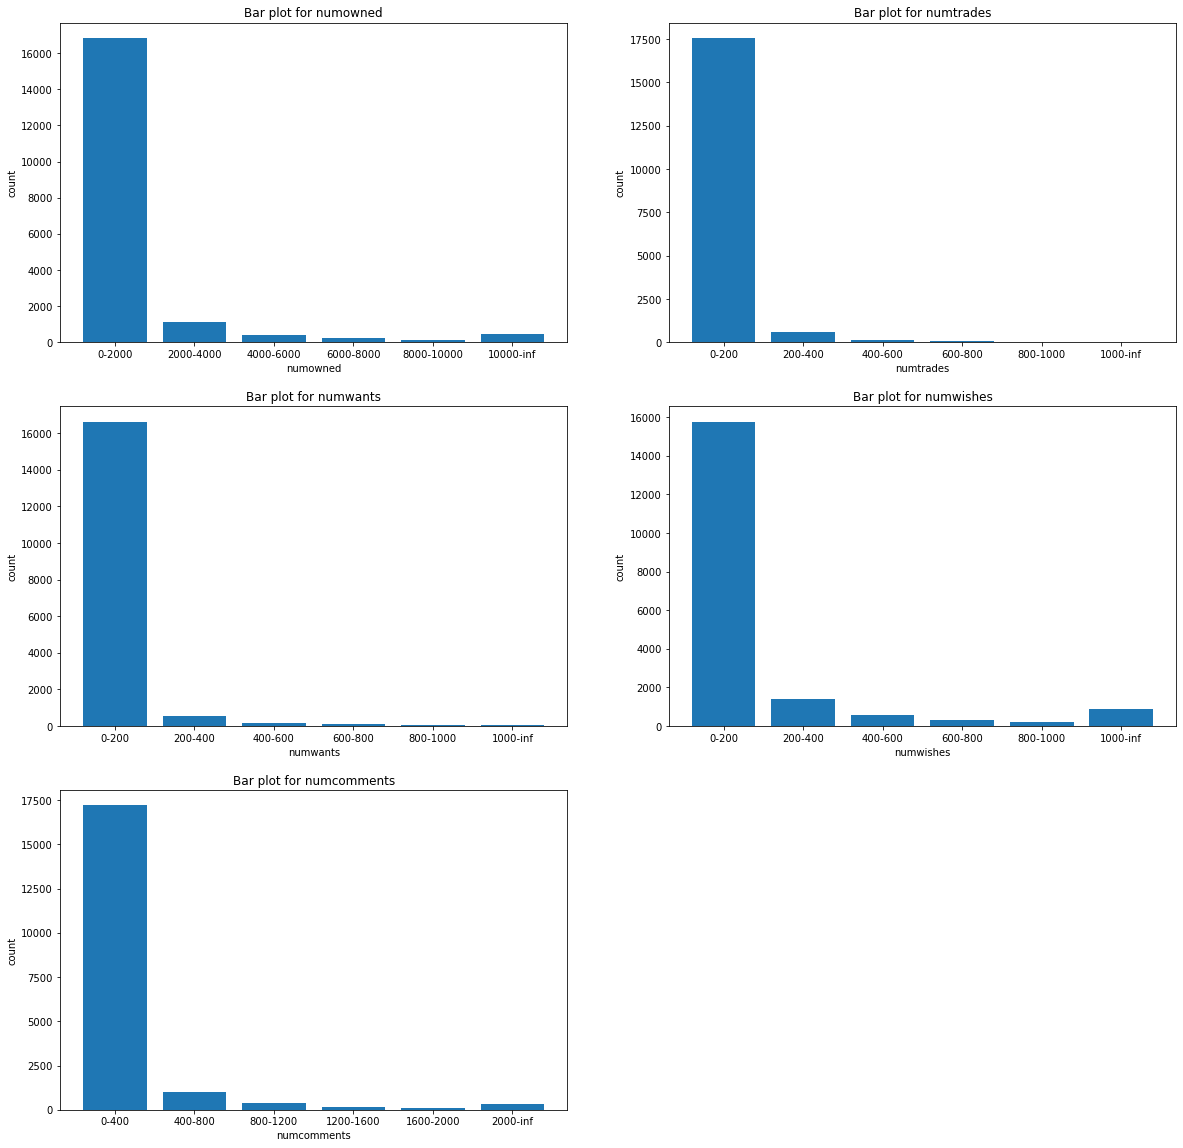

In [11]:
#visualize the numerical values
f = plt.figure(figsize=(20,20))

bins = list(range(0,10001, 2000))
bins.append(np.inf)
ax1 = f.add_subplot(321)
plot_barplot(df, 'numowned', bins)

bins = list(range(0,1001, 200))
bins.append(np.inf)
ax2 = f.add_subplot(322)
plot_barplot(df, 'numtrades', bins)

bins = list(range(0,1001, 200))
bins.append(np.inf)
ax3 = f.add_subplot(323)
plot_barplot(df, 'numwants', bins)

bins = list(range(0,1001, 200))
bins.append(np.inf)
ax4 = f.add_subplot(324)
plot_barplot(df, 'numwishes', bins)

bins = list(range(0,2001, 400))
bins.append(np.inf)
ax5 = f.add_subplot(325)
plot_barplot(df, 'numcomments', bins)

plt.show()

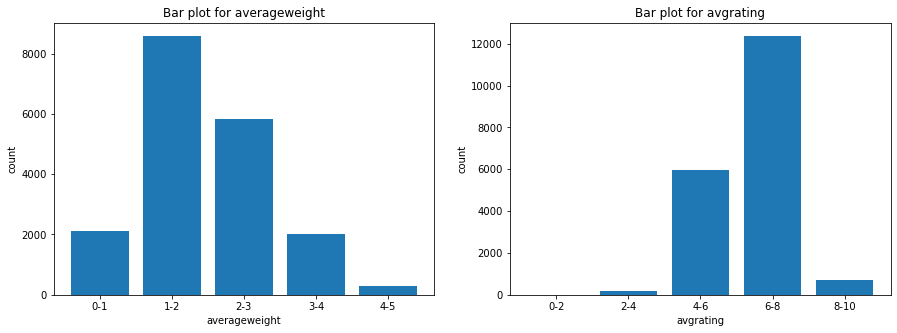

In [12]:
#visualize difficulties and ratings distribution
f2 = plt.figure(figsize=(15,5))

bins = list(range(0,6, 1))
ax1 = f2.add_subplot(121)
plot_barplot(df, 'averageweight', bins)

bins = list(range(0,11, 2))
ax2 = f2.add_subplot(122)
plot_barplot(df, 'avgrating', bins)

plt.show()

In [13]:
from plottings import correlation_plot

df2 = df[['yearpublished', 'minplayers',
       'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage',
        'numratings',
       'avgrating', 'bayesavgrating', 'rank', 
       'numowned', 'numtrades', 'numwants', 'numwishes', 'numcomments',
       'numweights', 'averageweight']]

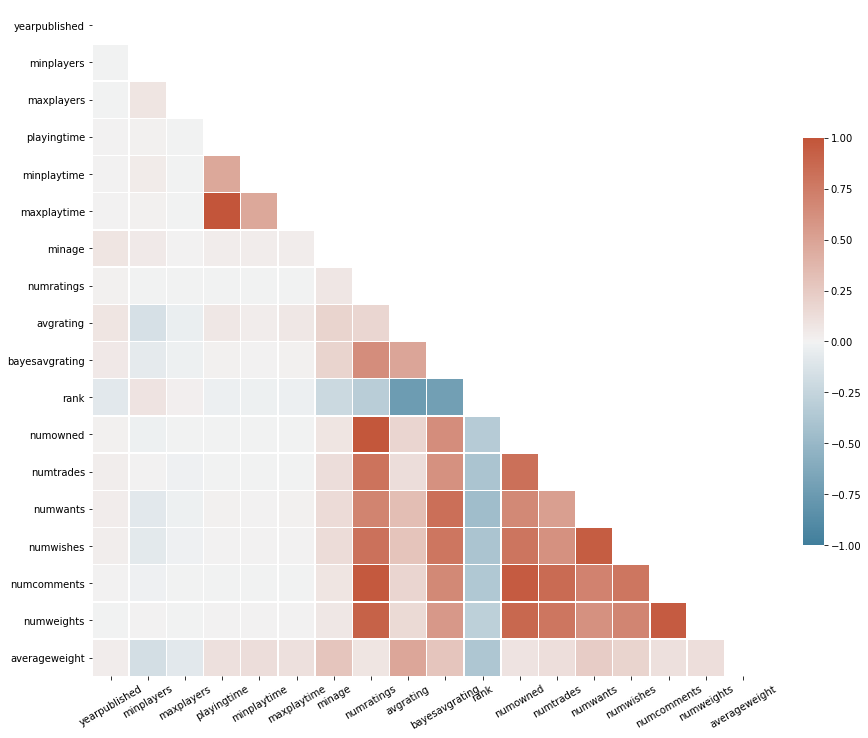

In [14]:
fig = plt.figure(figsize=(15,15))
correlation_plot(df2)

In [15]:
from plottings import read_correlation
read_correlation(df2.corr())

Enter two colnames(seprating by space): numowned numweights


0.8802044942261992

In [16]:
games['designer']

0                            [Matt Leacock]
1                      [Klaus-Jürgen Wrede]
2                            [Klaus Teuber]
3                           [Antoine Bauza]
4                     [Donald X. Vaccarino]
                        ...                
19225          [Andrew Lawson, Jack Lawson]
19226                     [PJ Lim, RB Ting]
19227        [Christian Fiore, Knut Happel]
19228    [Peter Joustra, Corné van Moorsel]
19229                                    []
Name: designer, Length: 19230, dtype: object

In [17]:
from plottings import unpack_words
from plottings import word_cloud

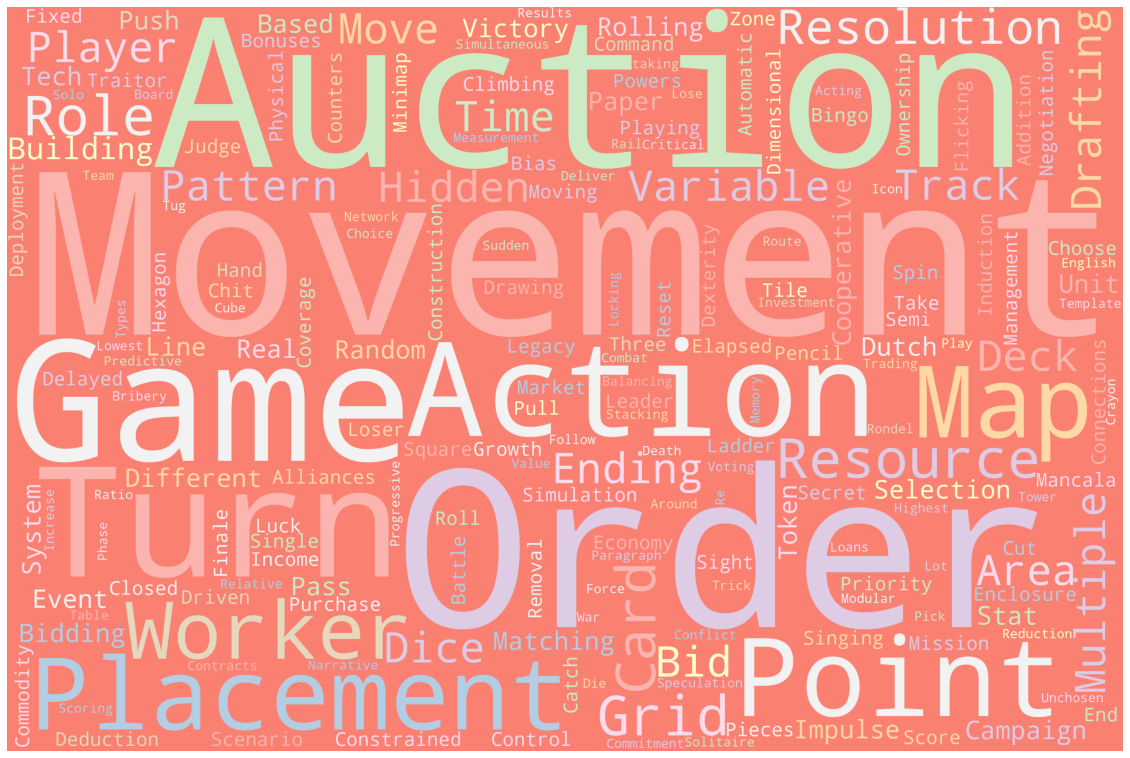

In [18]:
unique_mechanic = set(unpack_words(df['mechanic']))
word_cloud(' '.join(unique_mechanic))

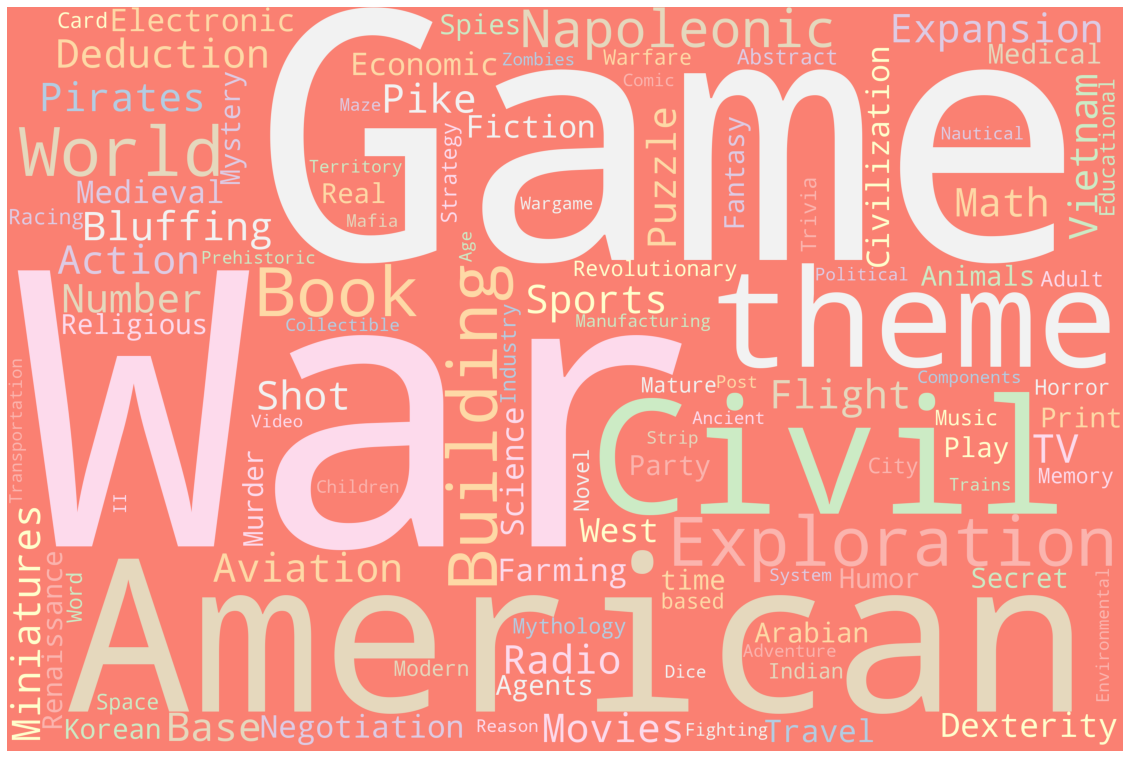

In [19]:
unique_category = set(unpack_words(df['category']))
word_cloud(' '.join(unique_category))

In [20]:
df.columns

Index(['id', 'name', 'description', 'yearpublished', 'minplayers',
       'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage',
       'category', 'mechanic', 'designer', 'publisher', 'numratings',
       'avgrating', 'bayesavgrating', 'rank', 'stdrating', 'medianrating',
       'numowned', 'numtrades', 'numwants', 'numwishes', 'numcomments',
       'numweights', 'averageweight'],
      dtype='object')